# GITHUB INTRODUCTION


# INTRODUCTION 
Kaggle is the world's largest Data Science Community and from 10/07/2020 to 10/30/2020 they conducted a survey to have a  comprehensive view of the state of data science and machine learning. 

An invitation to participate in the survey was sent to the entire Kaggle community (anyone opted-in to the Kaggle Email List)
The 2020 Kaggle DS & ML Survey received 20,036 usable responses from participants in 171 different countries and territories. If a country or territory received less than 50 respondents, they were grouped into a group named “Other” for anonymity.
The dataset keeps the identity of the respondents anonymous but provides all other responses received from the users


# GOALS
The goal of my analysis is to visualize the response from Data Scientists in Nigeria and help answer the following questions
1. Is Data Science something that can work in Nigeria?
2. What programming language do I need to learn?
3. Which IDE is best for me?
4. What kind of computer do I need?
5. Is there I place I can get good courses? 
6. How much money would I spend to learn this skill?
7. How much can I earn??


In [1]:
# importing the modules I'll need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r"C:\Users\VICTOR JOY\Downloads\kaggle-survey-2020\kaggle_survey_2020_responses.csv", low_memory = False)

# reading the dataset from the directory in my local computer. The csv file is attached to this repo.
# low_memory is set to False because Pandas tries to determine what dtype to set by analyzing the data in each column and this is usually memory demanding

# DESCRIPTIVE STATISTICS

In [6]:
data.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The dataset has 355 features and 20,036 observations
data.shape

(20037, 355)

In [12]:
# feature/column titles
data.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

In [15]:
# this shows the amount of responses received from each feature, the unique, top and most occuring responses.

data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
count,20037,20037,20037,20037,19570,19278,19121,15531,4278,7536,...,1178,495,431,3200,558,481,847,520,3083,252
unique,4196,12,6,56,8,14,8,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,565,25-29,Man,India,Master’s degree,Student,3-5 years,Python,R,SQL,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,None,Other
freq,36,4011,15789,5851,7859,5171,4546,15530,4277,7535,...,1177,494,430,3199,557,480,846,519,3082,251


# SUMMARY OF THE DATASET

The dataset has 355 features, some of which are followup questions that were answered by a few respondents.
Respondents with the most experience were asked the most questions. For example, students and unemployed persons were not asked questions about their employer. Likewise, respondents that do not write code were not asked questions about writing code.

For the sake of this analysis, we'll be working with the following features.
1. Q1 - Age
2. Q2 - Gender
3. Q4 - Level of Qualification
4. Q5 - Current Role
5. Q6 - Years of Experience
6. Q7 - Programming Language Used
7. Q8 - Recommended Programming Language




# EXTRACTING RESPONSES FROM NIGERIAN KAGGLERS

In [16]:
data_nig = data[1:][data["Q3"] == "Nigeria"]

<ipython-input-16-3482060441d6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_nig = data[1:][data["Q3"] == "Nigeria"]


In [17]:
data_nig

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
63,954,35-39,Man,Nigeria,Doctoral degree,Student,1-2 years,Python,NaN,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,118,18-21,Woman,Nigeria,Master’s degree,Student,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,97987,18-21,Man,Nigeria,Bachelor’s degree,Student,3-5 years,Python,NaN,NaN,...,Weights & Biases,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,Trains,Domino Model Monitor,NaN,NaN
138,127893,35-39,Man,Nigeria,Bachelor’s degree,Software Engineer,10-20 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,768,18-21,Man,Nigeria,I prefer not to answer,Data Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19917,1272,40-44,Man,Nigeria,Master’s degree,Business Analyst,< 1 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19932,512,25-29,Man,Nigeria,Bachelor’s degree,Student,1-2 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN
19951,494,22-24,Man,Nigeria,Master’s degree,Other,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20012,515,18-21,Man,Nigeria,Bachelor’s degree,Data Analyst,1-2 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# there's 476 responses from Nigeria
data_nig.shape

(476, 355)

# VISUALIZATIONS

## Q1: Age

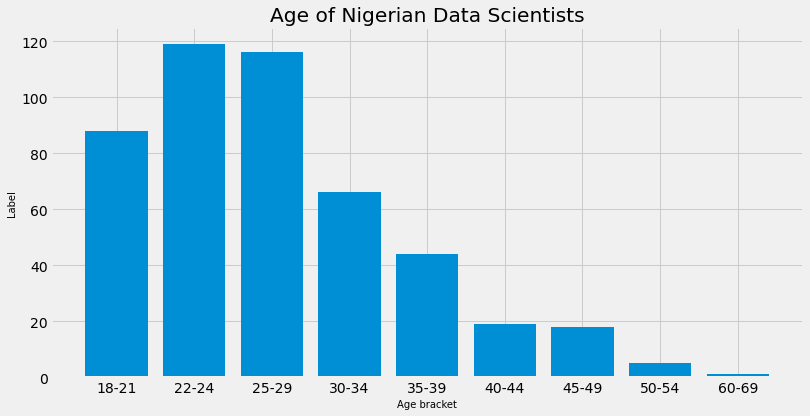

In [33]:
data_q1 = data_nig['Q1'].value_counts().sort_index()

plt.style.use("fivethirtyeight")
plt.figure(figsize = (12, 6))
plt.bar(data_q1.index, data_q1)

plt.title("Age of Nigerian Data Scientists")
plt.xlabel("Age bracket", fontsize = 10)
plt.ylabel("Label", fontsize = 10)

plt.show()


The highest occuring age is 

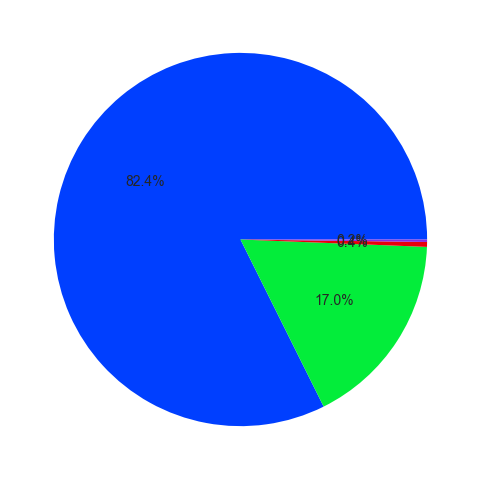

In [45]:

data_q2 = data_nig['Q2'].value_counts()
plt.style.use('seaborn-bright')
plt.figure(figsize = (10,8))
plt.pie(data_q2, autopct = '%1.1f%%')
plt.show()